#### ML task 1
You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
Detect the outliers and remove it using:
1.	 Mean Function
2.	Percentile method
3.	IQR(Inter quartile range method)
4.	Normal distribution
5.	Zscore method
Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))Check the correlation between all the numerical columns and plot heatmap.
Scatter plot between the variables to check the correlation between them.

### This is a dataset of property prices in the Bangalore city. It has been analysed and the outliers are detected and removed using the following methods:
1. Percentile method
2. IQR method
3. Normal distribution method
4. Z score method
5. Mean function


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


### The data set has 13200  rows and 7 columns. Two are categorical columns and 5 are  numerical columns.

In [5]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
### Here we can see that there is a remarkable  variation between the mean and std deviation values when we consider the price column. So we take price column to detect the outlier

In [6]:
df.price_per_sqft.mean()

7920.336742424242

In [7]:
df.price_per_sqft.median()

5438.0

In [7]:
df.price.mean()### gives the mean of the column price

112.27617765151514

In [8]:
df.price.median()## gives the median of the price column

71.85

####  A significant difference is seen between mean and median. It shows the presence of outliers.

<Axes: xlabel='price', ylabel='Count'>

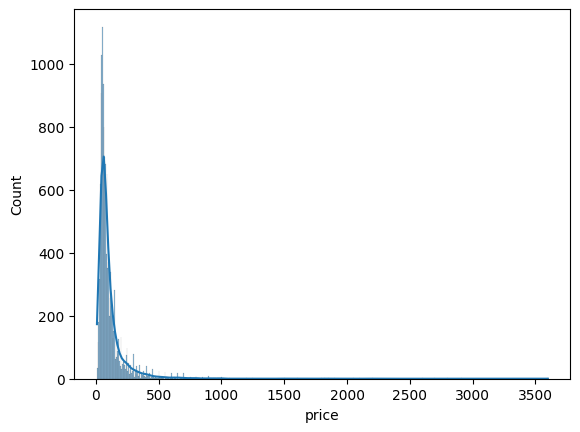

In [28]:
sns.histplot(data=df,x=df.price,kde=True)


#### From the above plot, we can see that the data is not normally distributed. It is right skewed.

<Axes: ylabel='price'>

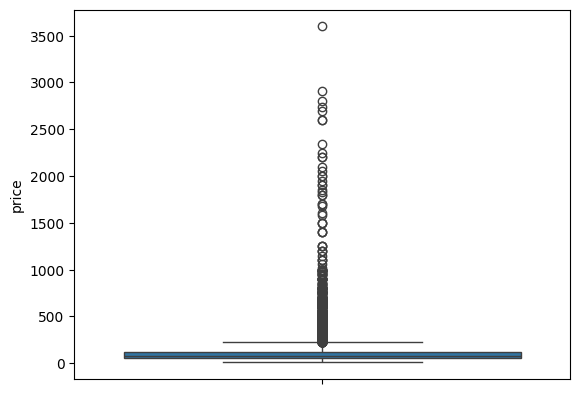

In [29]:
sns.boxplot(df['price'])


### PERCENTILE METHOD

In [9]:
df.price.quantile([0.25,0.30,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.76,0.78,0.80,0.82,0.85,0.90,0.92,0.95,0.96,0.97,0.98])## to find the percentile

0.25     50.0000
0.30     54.0000
0.40     62.0000
0.45     66.0000
0.50     71.8500
0.55     77.2700
0.60     85.0000
0.65     93.0205
0.70    104.0000
0.75    120.0000
0.76    123.0000
0.78    130.0000
0.80    139.0000
0.82    150.0000
0.85    165.0000
0.90    220.0000
0.92    250.0000
0.95    320.0000
0.96    350.0000
0.97    400.0000
0.98    495.0800
Name: price, dtype: float64

In [ ]:
 #### When we take the percentile for different percentages, we can see that  from 0.85 to 0.90 there is a remarkable variation in the value.

In [10]:
df[df.price>df.price.quantile(0.85)]## values greater than 85th percentile are treated as outliers.

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6,Old Airport Road,4 BHK,2732.0,4,204.0,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4,600.0,4,18181
9,other,6 Bedroom,1020.0,6,370.0,6,36274
11,Whitefield,4 Bedroom,2785.0,5,295.0,4,10592
18,other,3 BHK,2770.0,4,290.0,3,10469
...,...,...,...,...,...,...,...
13186,other,4 Bedroom,1200.0,5,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9,250.0,7,16666
13195,Whitefield,5 Bedroom,3453.0,4,231.0,5,6689
13196,other,4 BHK,3600.0,5,400.0,4,11111


#### So we take those values greater than 0.85 as outliers. and  less than 0.85 as without outliers. So there are 1957 outliers in the existing data. Use capping method to remove thos outliers. 

In [11]:
df_no_outliers=df[df.price<df.price.quantile(0.85)]
df_no_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13192,Bellandur,2 BHK,1262.0,2,47.00,2,3724
13193,Uttarahalli,3 BHK,1345.0,2,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


<Axes: xlabel='price', ylabel='Count'>

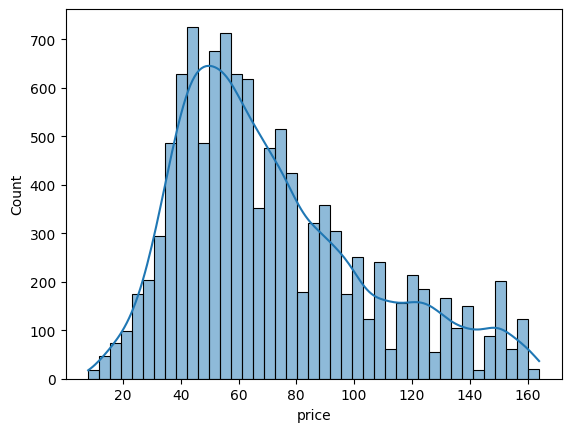

In [26]:
sns.histplot(data=df_no_outliers,x=df_no_outliers.price,kde=True)


### From the histplot of data without outliers, we can see that the skewness is reduced and the data is normally distributed.

<Axes: ylabel='price'>

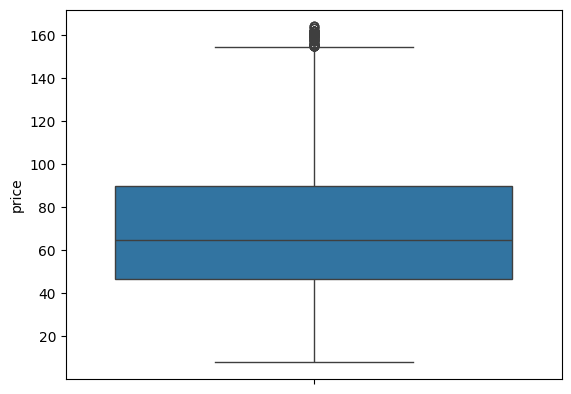

In [30]:
sns.boxplot(df_no_outliers['price'])


## Interquartile method

In [12]:
q1=df.price.quantile(0.25)
print("q1 =", q1)
q3=df.price.quantile(0.75)
print("q3 =", q3)
IQR=q3-q1
print("IQR =", IQR)


q1 = 50.0
q3 = 120.0
IQR = 70.0


In [13]:
lowerwhisker=q1-1.5*IQR
upperwhisker=q3+1.5*IQR
print("lowerwhisker =", lowerwhisker)
print("upperwhisker =", upperwhisker)

lowerwhisker = -55.0
upperwhisker = 225.0


### From the above equation we came to know  the limits as -55 and 225. 

In [14]:
df[(df.price<-55) |  (df.price>225)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4,600.0,4,18181
9,other,6 Bedroom,1020.0,6,370.0,6,36274
11,Whitefield,4 Bedroom,2785.0,5,295.0,4,10592
18,other,3 BHK,2770.0,4,290.0,3,10469
22,Thanisandra,4 Bedroom,2800.0,5,380.0,4,13571
...,...,...,...,...,...,...,...
13186,other,4 Bedroom,1200.0,5,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9,250.0,7,16666
13195,Whitefield,5 Bedroom,3453.0,4,231.0,5,6689
13196,other,4 BHK,3600.0,5,400.0,4,11111


In [ ]:
### the outliers are reduced to 1250 using IQR method which is more precise than percentile method.

In [15]:
df_without_outliers=df[(df.price>-55) & (df.price<225)]
df_without_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13192,Bellandur,2 BHK,1262.0,2,47.00,2,3724
13193,Uttarahalli,3 BHK,1345.0,2,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


### the  data without ouliers are 11908. 

<Axes: xlabel='price', ylabel='Count'>

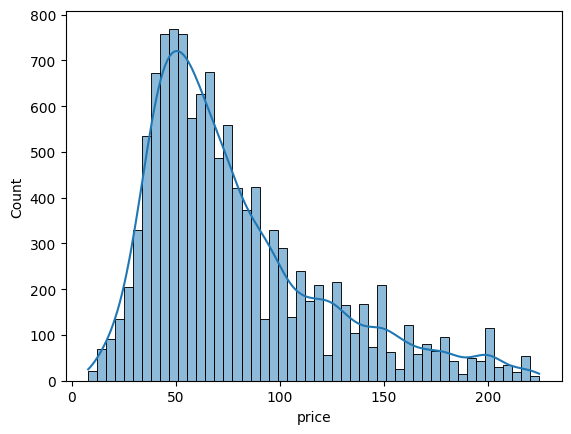

In [27]:
sns.histplot(data=df_without_outliers,x=df_without_outliers.price,kde=True)


### formn the histplot  we can see that the data without outliers is normally distributed.

<Axes: ylabel='price'>

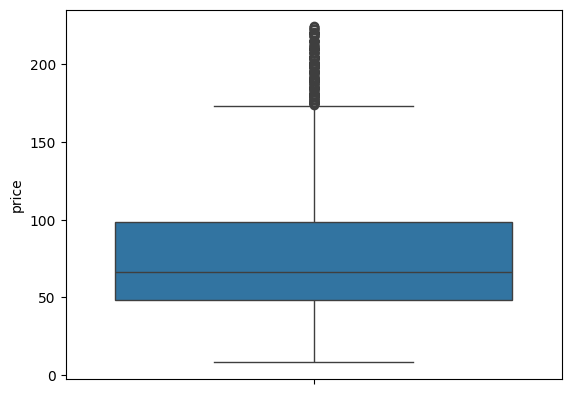

In [31]:
sns.boxplot(df_without_outliers['price'])


## Normal distribution method


<Axes: xlabel='price', ylabel='Count'>

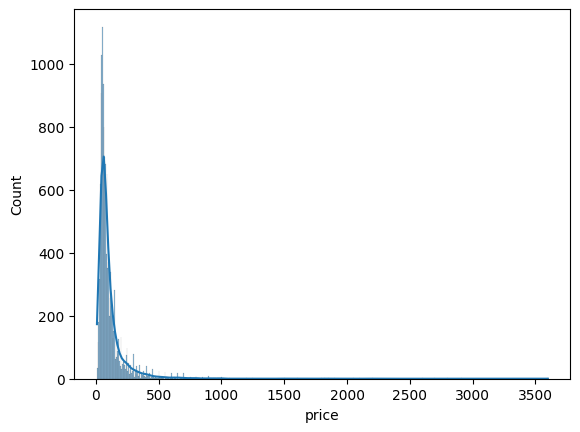

In [16]:
sns.histplot(data=df, x=df.price, kde=True)

### this is the histplot of the given dataset with respect to the price . From this we can see that it is not normally distributed.


In [17]:
m=df.price.mean()
m

112.27617765151514

In [18]:
s=df.price.std()
s

149.17599517809637

In [19]:
m-3*s

-335.25180788277396

In [20]:
m+3*s

559.8041631858042

In [63]:
df[(df.price<-335) | (df.price>559)]  #Outliers


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
7,Rajaji Nagar,4 BHK,3300.00,4,600.0,4,18181,3.269452
61,Whitefield,4 Bedroom,5700.00,5,650.0,4,11403,3.604627
157,Mahalakshmi Layout,4 Bedroom,3750.00,4,760.0,4,20266,4.342011
404,Rajaji Nagar,7 BHK,12000.00,6,2200.0,7,18333,13.995039
435,Whitefield,4 Bedroom,11890.00,4,700.0,4,5887,3.939802
...,...,...,...,...,...,...,...,...
12967,other,5 BHK,5665.84,7,988.0,5,17437,5.870407
12976,other,4 BHK,6652.00,6,660.0,4,9921,3.671662
13000,other,4 Bedroom,6688.00,6,700.0,4,10466,3.939802
13078,other,4 Bedroom,9200.00,4,2600.0,4,28260,16.676435


In [21]:
newdf=df[(df.price>-335) & (df.price<559)]### data without outliers
newdf

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


### using normal distribution method, we get 13007 data as without outliers. 

<Axes: xlabel='price', ylabel='Count'>

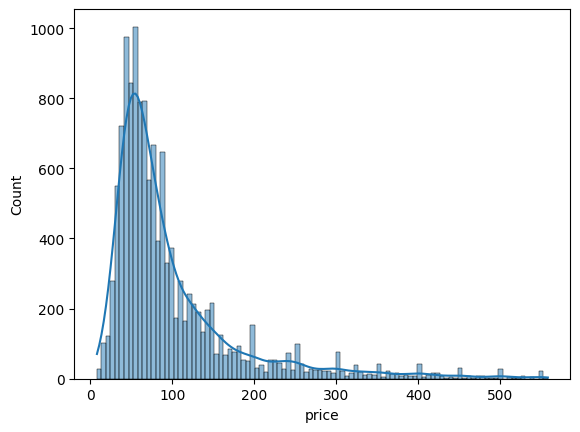

In [22]:
sns.histplot(data=newdf, x=newdf.price, kde=True)

<Axes: ylabel='price'>

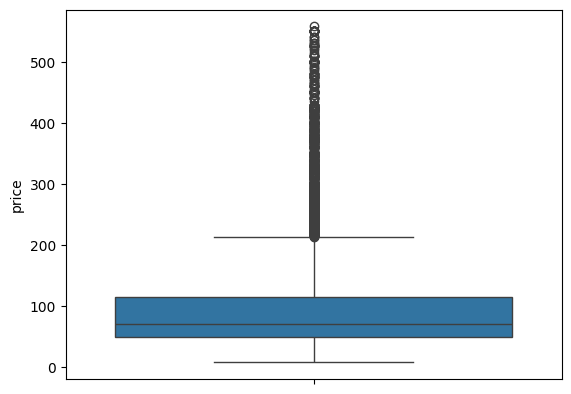

In [32]:
sns.boxplot(newdf['price'])


## Z score method

## Z score=(x-mean)/std

In [23]:
df["Zscore"]= (df.price-m)/s
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.490737
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,0.051777
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.337026
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.115811
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.410764
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,0.795864
13196,other,4 BHK,3600.0,5,400.00,4,11111,1.928754
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.350433
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,2.518661


### First we find the z score of each value of  price column.

In [24]:
newdf1=df[(df.Zscore > -3) & (df.Zscore < 3)]  ## data without outliers
newdf1

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.490737
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,0.051777
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.337026
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.115811
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.410764
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,0.795864
13196,other,4 BHK,3600.0,5,400.00,4,11111,1.928754
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.350433
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,2.518661


###Here also we get 13008 data as without outliers.

<Axes: xlabel='price', ylabel='Count'>

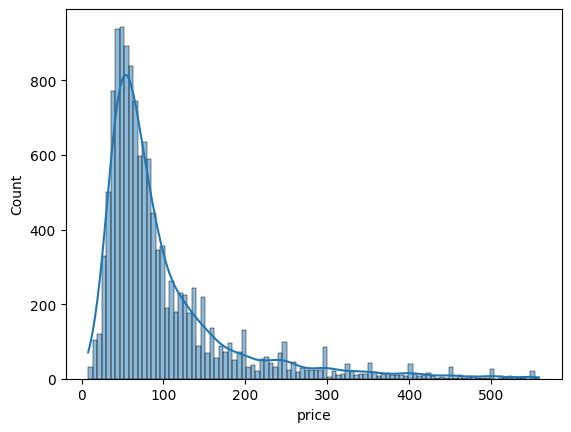

In [25]:
sns.histplot(data=newdf1,x=newdf1.price,kde=True)


<Axes: ylabel='price'>

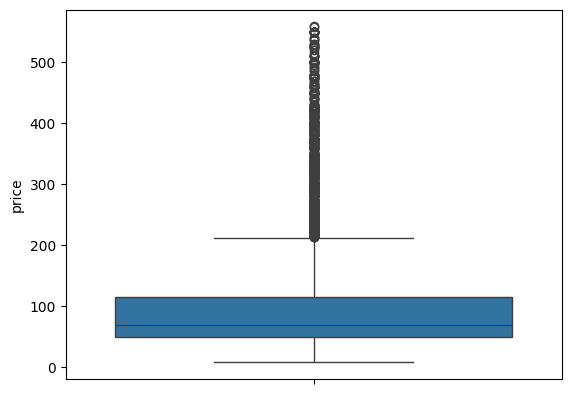

In [42]:
sns.boxplot(newdf1['price'])


### histplot of price per sqft column

<Axes: xlabel='price_per_sqft', ylabel='Count'>

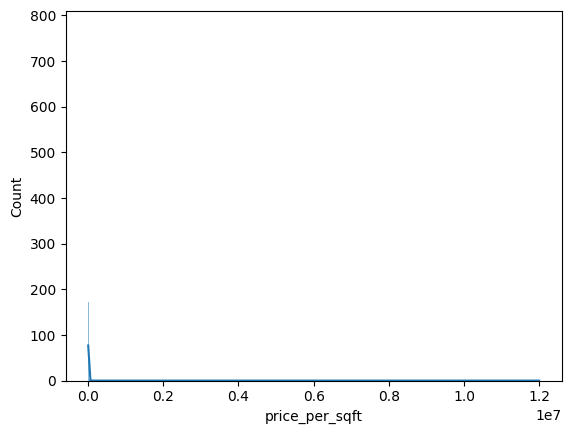

In [43]:
sns.histplot(data=df,x=df.price_per_sqft,kde=True)

## Correlation

### To check the correlation we have to drop the categorical columns like location and size



In [44]:
corrnew=df.drop(columns=["location","size",],axis=1)
corrnew

,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,1056.0,2,39.07,2,3699,-0.490737
1,2600.0,5,120.00,4,4615,0.051777
2,1440.0,2,62.00,3,4305,-0.337026
3,1521.0,3,95.00,3,6245,-0.115811
4,1200.0,2,51.00,2,4250,-0.410764
...,...,...,...,...,...,...
13195,3453.0,4,231.00,5,6689,0.795864
13196,3600.0,5,400.00,4,11111,1.928754
13197,1141.0,2,60.00,2,5258,-0.350433
13198,4689.0,4,488.00,4,10407,2.518661


In [45]:
corr1=corrnew.corr()
corr1

,total_sqft,bath,price,bhk,price_per_sqft,Zscore
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267,0.574330
bath,0.392743,1.000000,0.455998,0.897951,0.030883,0.455998
price,0.574330,0.455998,1.000000,0.396883,0.028387,1.000000
bhk,0.346013,0.897951,0.396883,1.000000,0.030955,0.396883
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000,0.028387
Zscore,0.574330,0.455998,1.000000,0.396883,0.028387,1.000000


<Axes: >

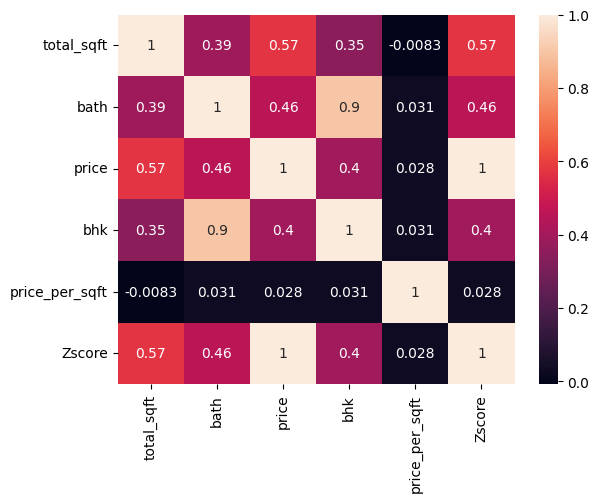

In [46]:
sns.heatmap(corr1,annot=True)


### Analysing the heat map we can conclude that price per sqft and total sqft are negatively related. All other variables showing positive relation.

### Scatter plot 

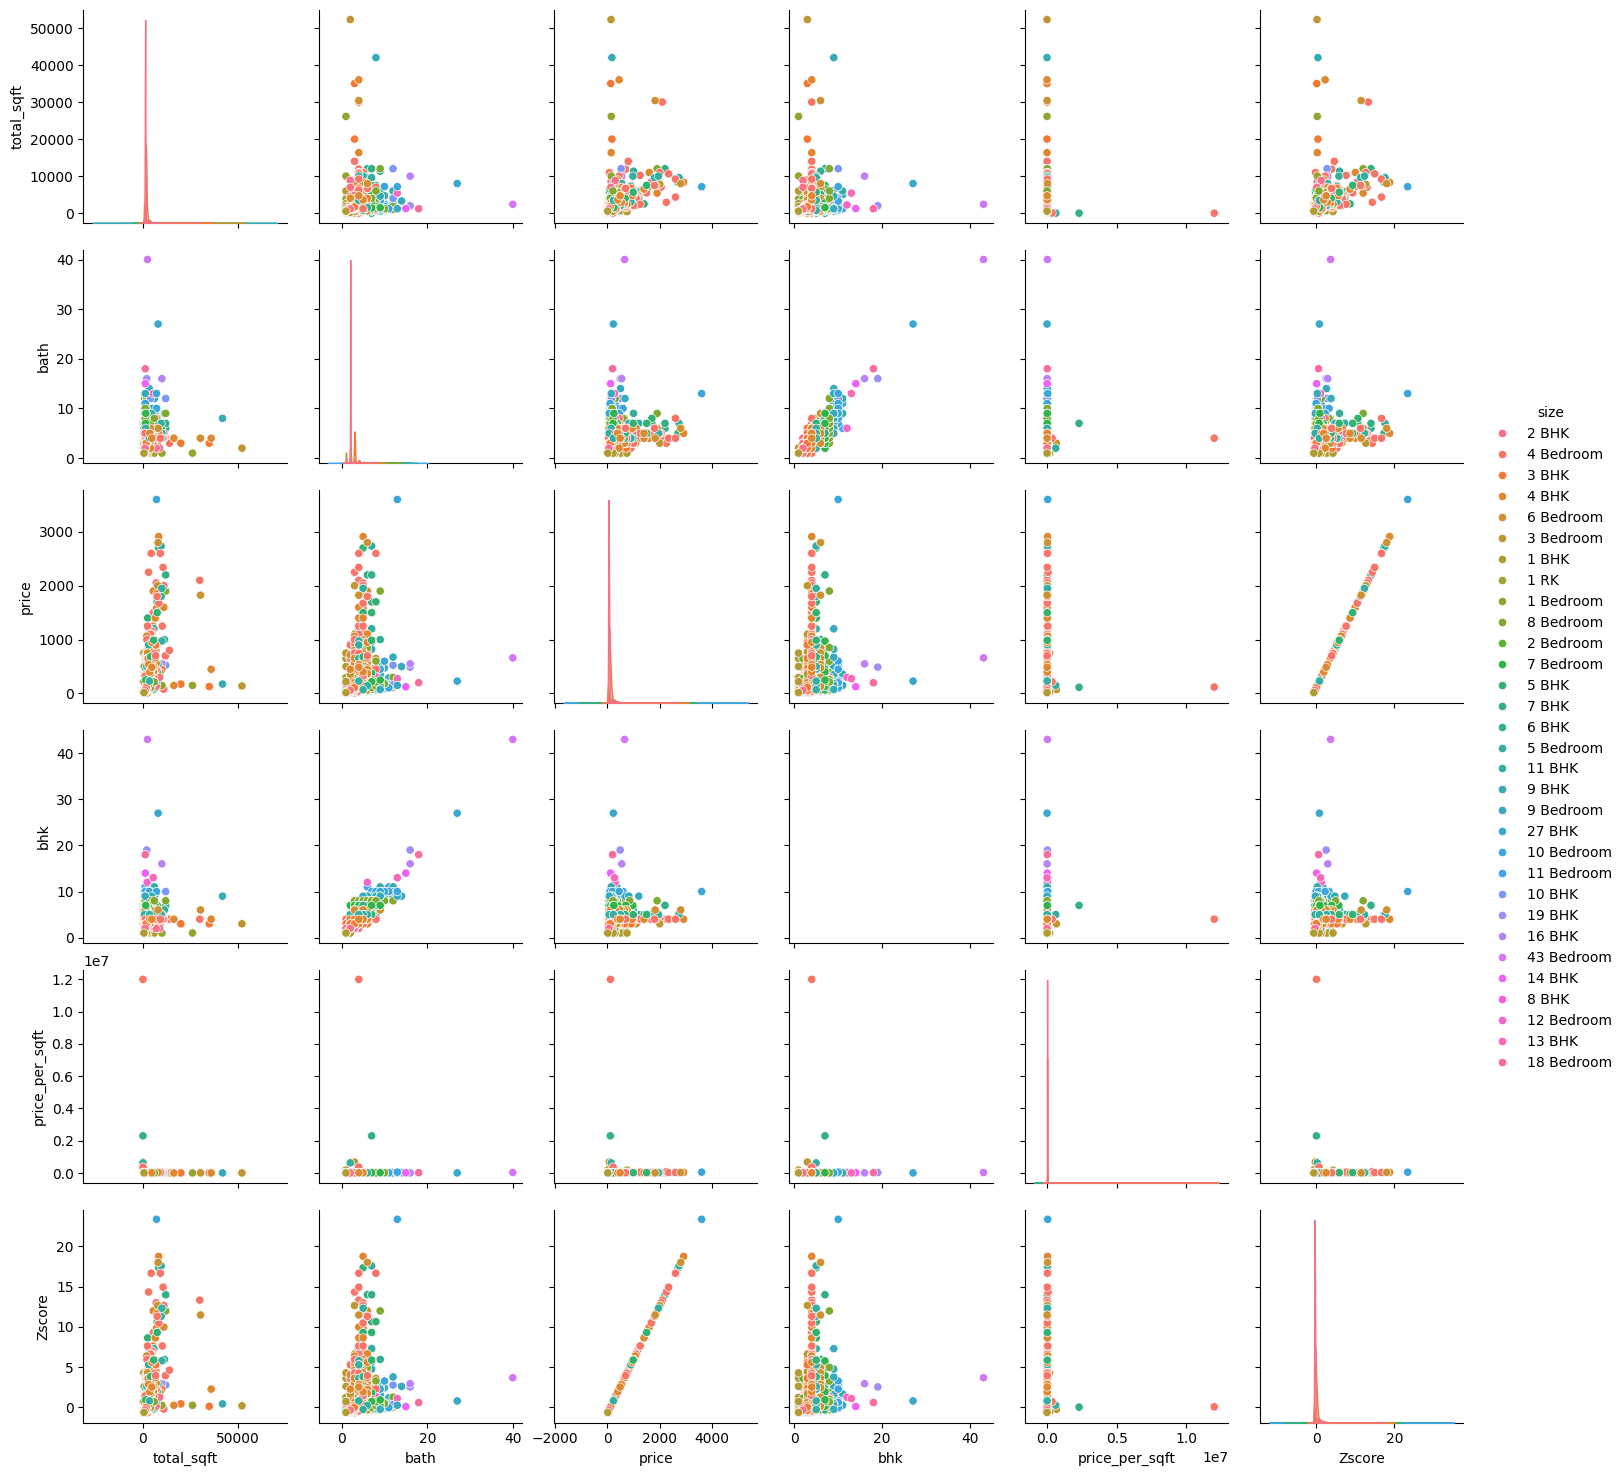

In [48]:
sns.pairplot(df,hue = "size")
plt.show()

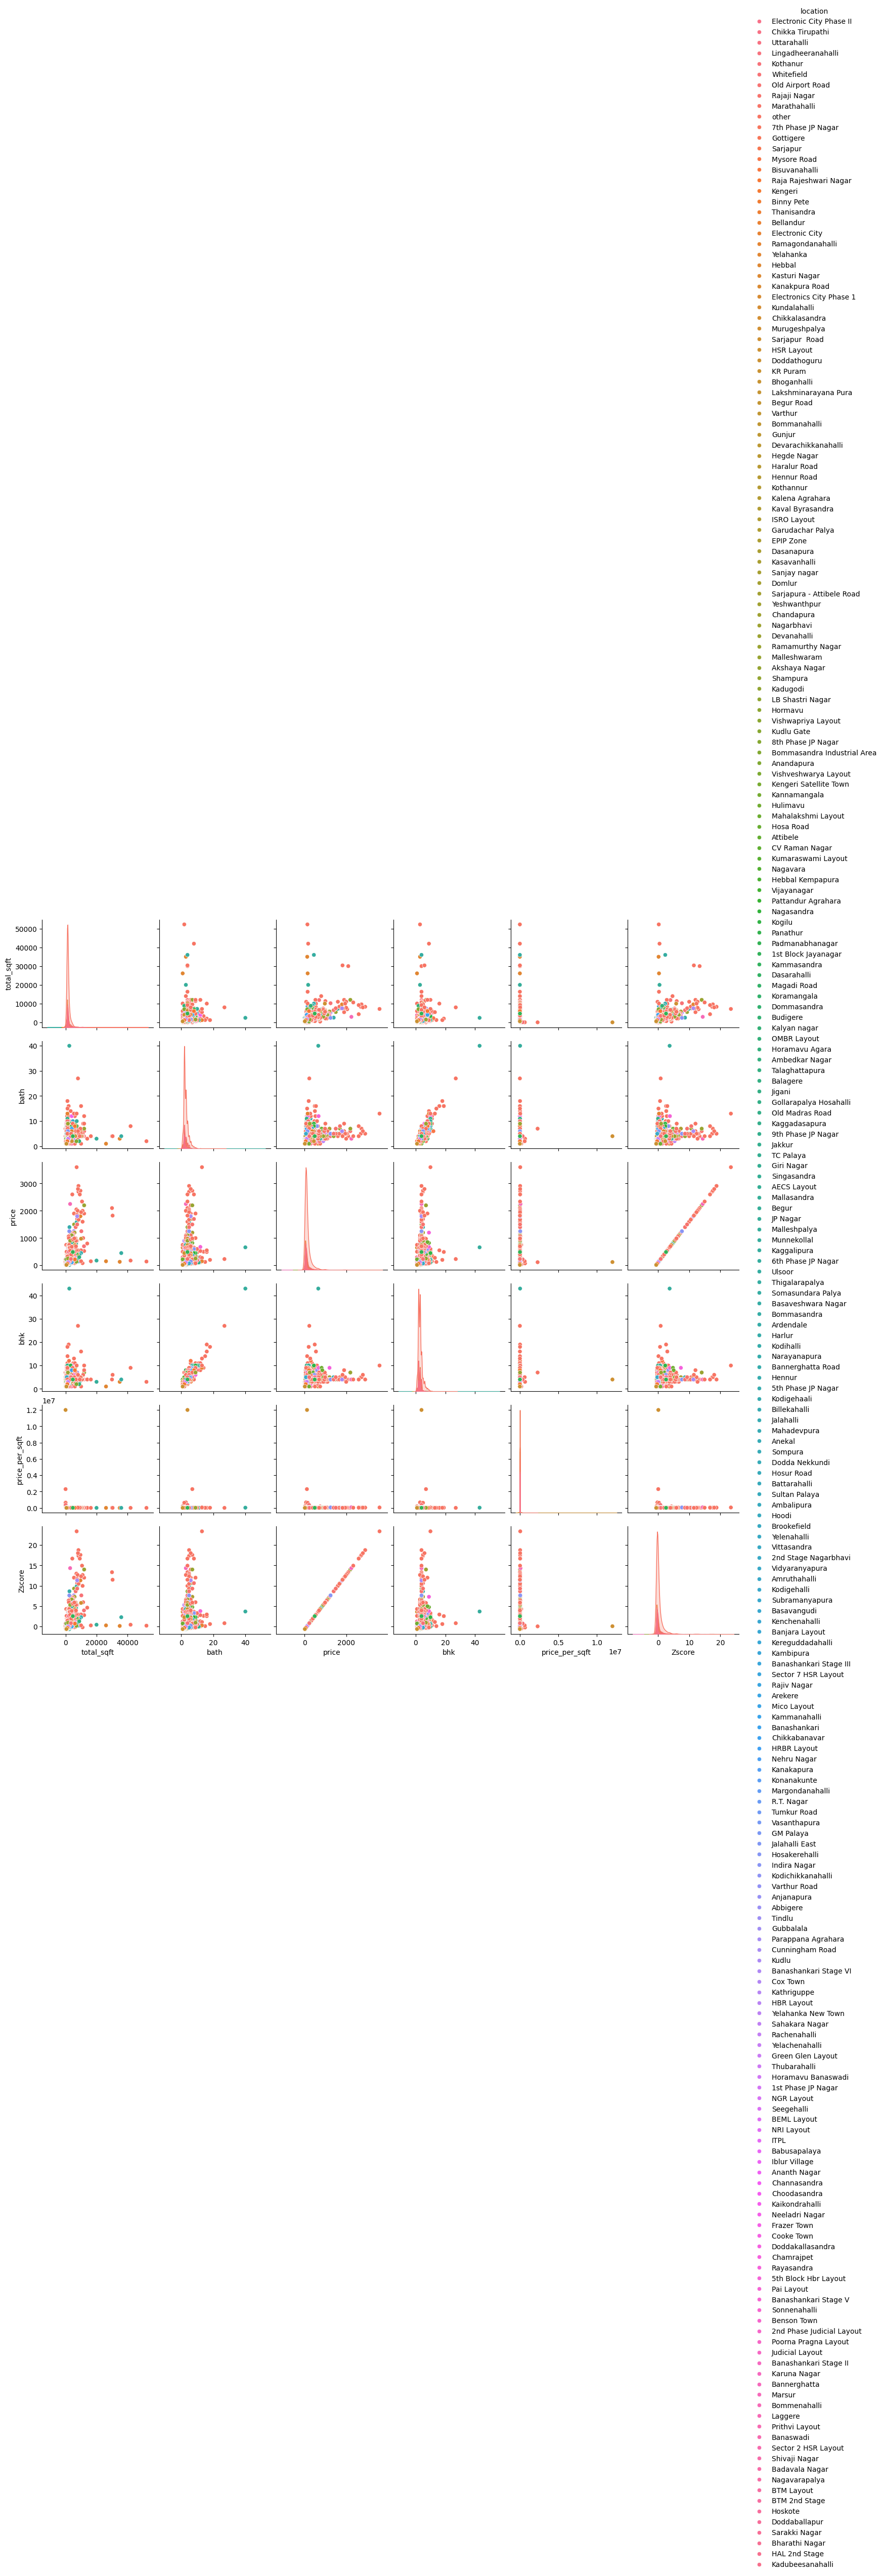

In [51]:
sns.pairplot(df,hue = "location")
plt.show()

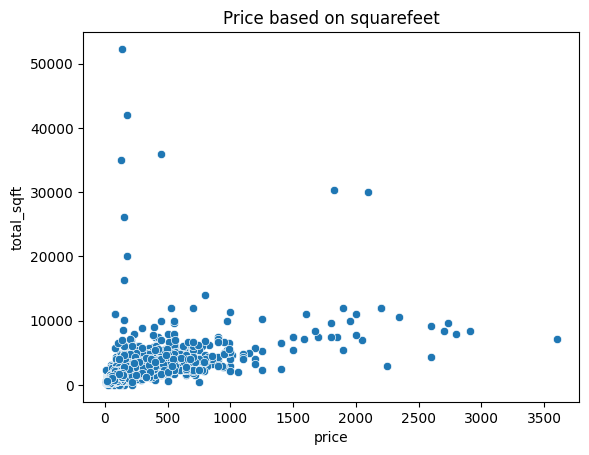

In [55]:
plt.title("Price based on squarefeet")
sns.scatterplot(x='price',y='total_sqft',data=df)
plt.show()


## Box plot for all numerical columns

### Box plot for price column

<Axes: ylabel='price'>

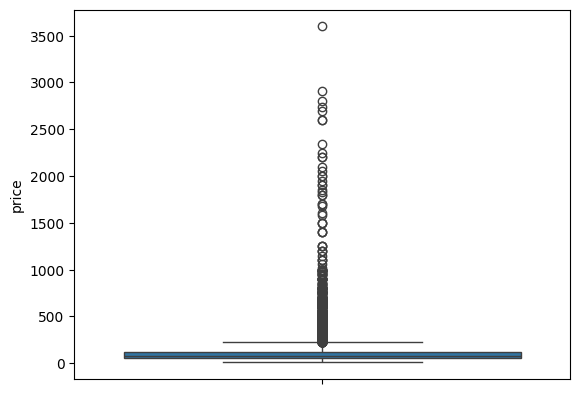

In [56]:
sns.boxplot(df['price'])


### Box plot for total sqft column

<Axes: ylabel='total_sqft'>

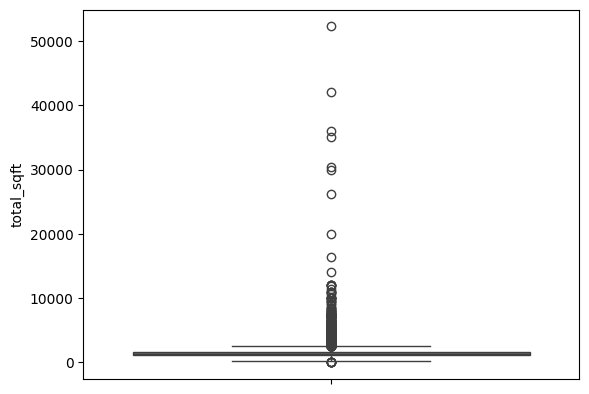

In [57]:
sns.boxplot(df['total_sqft'])


### Box plot for bath column

<Axes: ylabel='bath'>

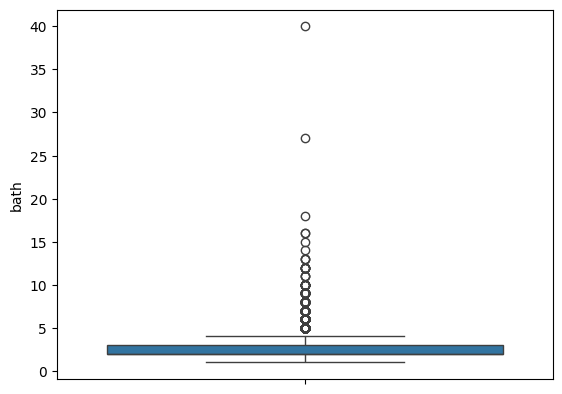

In [58]:
sns.boxplot(df['bath'])


#### Box plot for price per sqft column

<Axes: ylabel='price_per_sqft'>

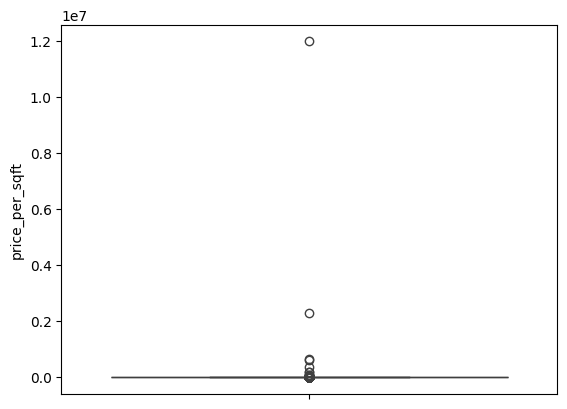

In [60]:
sns.boxplot(df['price_per_sqft'])


#### box plot for size column

<Axes: ylabel='size'>

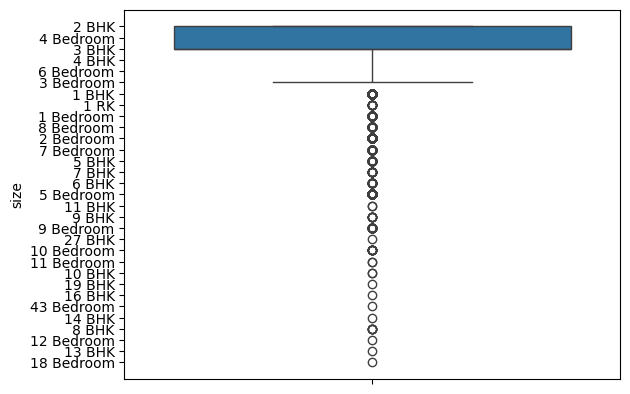

In [62]:
sns.boxplot(df['size'])
